In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
combined_df = pd.read_csv('cleaned_data/combined.csv')
combined_df['Sentence']=combined_df['Sentence'].astype(str)
neutral_df = combined_df[combined_df['Sentiment']==1]
positive_df = combined_df[combined_df['Sentiment']==2]
negative_df = combined_df[combined_df['Sentiment']==0]




In [3]:
combined_df

,Sentence,Sentiment
0,why is dxc technology company dxc down 113 sin...,0
1,fidelity fis buys payrix boosts e commerce cap...,2
2,sebi bars haldhar realty from raising money fr...,0
3,amgen foundation more than doubles commitment ...,2
4,brazos delaware ii llc moodys upgrades brazos...,2
...,...,...
57584,destia oy is a finnish infrastructure and cons...,1
57585,magellan midstream mmp stock rises 7 after ea...,2
57586,snap on incorporated to webcast 2022 first qua...,2
57587,jack henry adds vendor management to governanc...,2


In [4]:
# STOPWORDS is a set of common words that are not relevant and that we can omit 

set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [5]:

# This function combines each headline into a single string

def combiner(df):
    sentences = ''
    for sentence in df['Sentence']:
        sentence = str(sentence)
        string_list = sentence.split()
        for i in range(len(string_list)):
            string_list[i] = string_list[i].lower()
        sentences += " ".join(string_list)+" "
        
    return sentences



In [6]:

# This function plots the wordcloud and returns the wordcloud object

def cloud(sentences):
    wordcloud = WordCloud(width = 800, height = 400,
                    background_color ='white',
                    stopwords = set(STOPWORDS),
                    min_font_size = 10).generate(sentences)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    return(wordcloud)


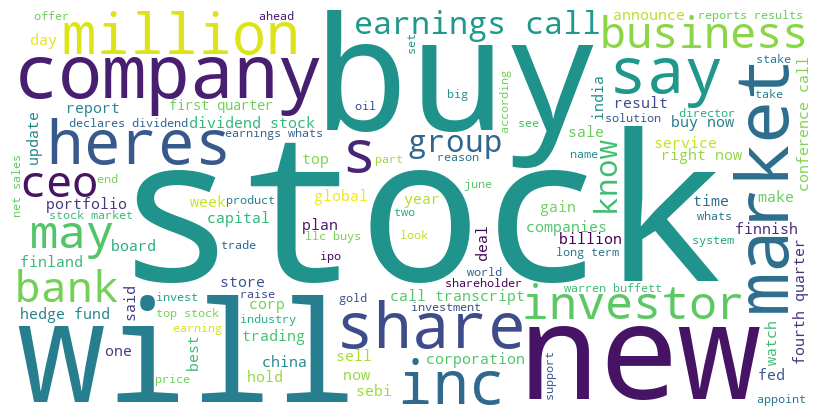

In [7]:
# neutral word cloud

neutral_cloud=cloud(combiner(neutral_df))

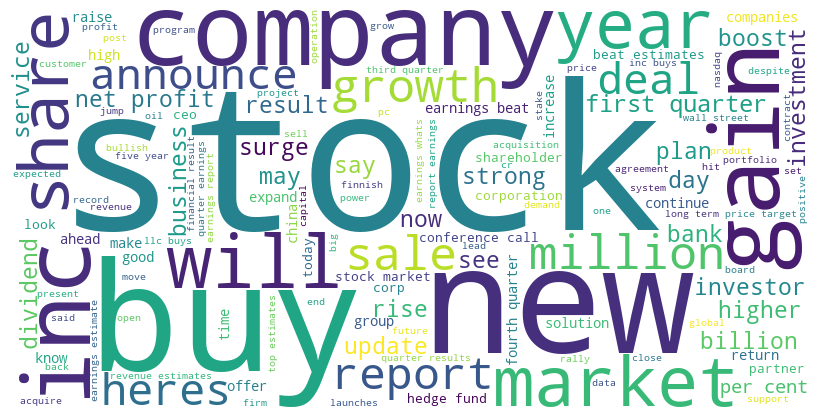

In [8]:
# positive wordcloud

positive_cloud=cloud(combiner(positive_df))

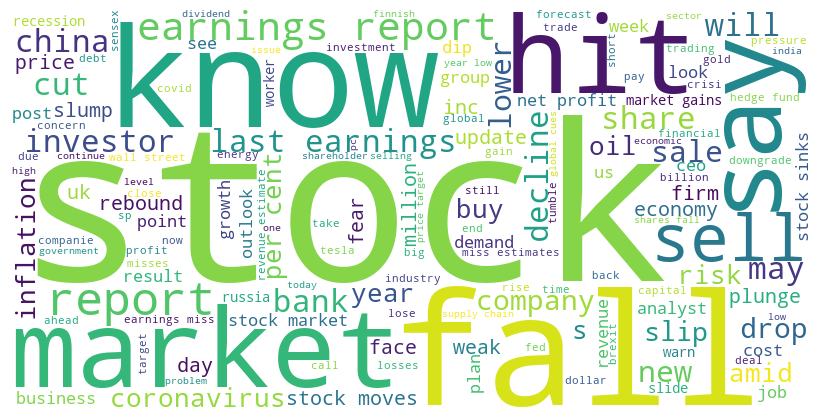

In [9]:
# negative wordcloud

negative_cloud=cloud(combiner(negative_df))

In [10]:
print(list(neutral_cloud.words_.keys())[:10])
print(list(positive_cloud.words_.keys())[:10])
print(list(negative_cloud.words_.keys())[:10])

['stock', 'buy', 'will', 'new', 'company', 'market', 'share', 'say', 'heres', 'inc']
['stock', 'buy', 'new', 'company', 'gain', 'inc', 'will', 'market', 'share', 'year']
['stock', 'fall', 'know', 'market', 'hit', 'say', 'sell', 'report', 'earnings report', 'last earnings']


Just from visual inspection of the wordclouds, it's clear that there appears to be enough that differentiates between negative and positive headlines, with words such as fall, weak, slip, cut, lower, risk, plunge, fear occuring frequently in the negative headlines and words such as surge, gain, strong, growth and rise occuring frequently in the positive headlines. Though these words are not necessarily negative and positive respectively, i.e., the sentence "fear subsides" is not a negative headline but contains the word fear, for the most part a sentence containing the word fear will be negative. 

Furthermore, though the neutral worldcloud consists mostly of words that could be said are neutral, it is clear upon inspection of combined.csv that some of the headlines labeled as neutral could equally be construed as positive. For example the 6th headline in neutral_df is,

In [25]:
print(f"headline: {neutral_df.iloc[5][0]}, sentiment: {neutral_df.iloc[5][1]}")

headline: why this fast growing dividend stock is a buy, sentiment: 1


Whereas, what we consider neutral are headlines that have zero sentiment such as,

In [26]:
print(f"headline: {neutral_df.iloc[2][0]}, sentiment: {neutral_df.iloc[2][1]}")

headline: january 09 2014 mecklai financial report on rupee, sentiment: 1


This large discrepancy between these two headlines that have both been labelled neutral is due to the fact that combined.csv is the combination of many data sets where it is clear that the creators of each data set have differing definitions of what neutral means. For example, in some data sets neutral is considered as anything that isn't finance related and in others neutral is considered as anything other than either bearish or bullish information regarding a specific stock.

Due to this ambiguity in the definition of neutral and the fact that there are many examples of clearly positive and negative headlines labeled as neutral, we have decided to only use the positive and negative headlines from the data set as to avoid 'confusing' the NN.

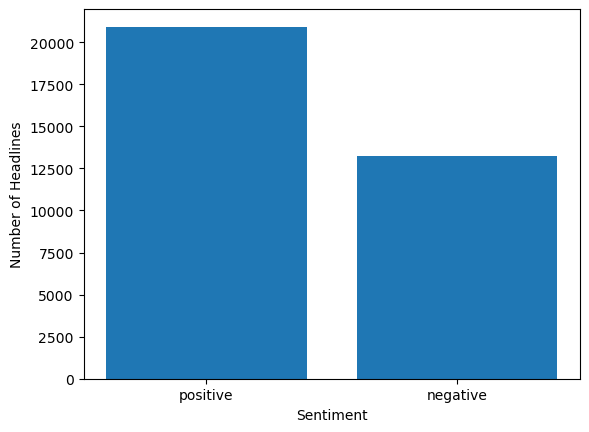

In [13]:
plt.bar(['positive','negative'],[positive_df.shape[0],negative_df.shape[0]])
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()

We can see from the barchart above that there is a significant class imbalance between positive and negative headlines. This could be dealt with using undersampling, where, if n is the number of negative headlines then n headlines are randomly sampled from the positive headlines without replacement. This way the NN will not be biased towards labelling a headline as postive, especially if most or all of the vocabulary in a new headline is unknown to the NN.